Exploratory Data Analysis: 

First we go and eexplore our data. 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import random, time
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix
from tqdm.notebook import tqdm, trange
import json
from PIL import Image

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [3]:
train_data = pd.read_json("/content/gdrive/MyDrive/522-project/train.jsonl", lines=True)
val_data = pd.read_json("/content/gdrive/MyDrive/522-project/dev_seen.jsonl",lines=True)
test_unseen_data = pd.read_json("/content/gdrive/MyDrive/522-project/test_seen.jsonl",lines=True)
test_seen_data = pd.read_json("/content/gdrive/MyDrive/522-project/test_unseen.jsonl",lines=True)

In [4]:
train_data.head(10)

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
5,16952,img/16952.png,0,go sports! do the thing! win the points!
6,76932,img/76932.png,0,fine you're right. now can we fucking drop it?
7,70914,img/70914.png,1,tattoos are bad for your health i know 5 milli...
8,2973,img/02973.png,0,how long can i run? till the chain tightens
9,58306,img/58306.png,0,what is he hiding? we need to see his tax retu...


In [5]:
test_unseen_data.head(10)

,id,img,label,text
0,16395,img/16395.png,1,handjobs sold seperately
1,37405,img/37405.png,1,introducing fidget spinner for women
2,94180,img/94180.png,1,happy pride month let's go beat up lesbians
3,54321,img/54321.png,1,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,1,finds out those 72 virgins.. are goats
5,73506,img/73506.png,1,look your dad fucked goats.. i capped him...so...
6,5429,img/05429.png,1,claims that her ancestors created a safe space...
7,70691,img/70691.png,0,overdose
8,69421,img/69421.png,1,when they laugh about your 9cm in the change r...
9,50162,img/50162.png,1,"roses are black, violets are black everything ..."


In [6]:
test_seen_data.head(10)

,id,img,label,text
0,15740,img/15740.png,1,when someone tells you how to bbq
1,38794,img/38794.png,1,when they say white folks don't know how to cook
2,60792,img/60792.png,1,the original derp-face
3,71824,img/71824.png,1,okay here you go! you piece of shit!
4,4796,img/04796.png,1,xboxone farming 1619 simulator
5,75310,img/75310.png,1,how roaches be when you shut off the kitchen l...
6,63425,img/63425.png,1,when they say white people have no culture
7,72360,img/72360.png,1,picking up jewish girls the old fashioned way
8,17203,img/17203.png,1,mmm...this gas bill is getting expensive
9,76803,img/76803.png,1,pol the look on your face when the press think...


In [7]:
val_data.head(10)

,id,img,label,text
0,8291,img/08291.png,1,white people is this a shooting range
1,46971,img/46971.png,1,bravery at its finest
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...
4,80243,img/80243.png,1,mississippi wind chime
5,5279,img/05279.png,1,"knowing white people , that's probably the bab..."
6,1796,img/01796.png,1,life hack #23 how to get stoned with no weed
7,53046,img/53046.png,1,"you've heard of elf on a shelf, now get ready for"
8,82301,img/82301.png,1,cooooooooooooon!!!!
9,31752,img/31752.png,1,when you get to choose your own mental illness


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8500 non-null   int64 
 1   img     8500 non-null   object
 2   label   8500 non-null   int64 
 3   text    8500 non-null   object
dtypes: int64(2), object(2)
memory usage: 265.8+ KB


In [9]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      500 non-null    int64 
 1   img     500 non-null    object
 2   label   500 non-null    int64 
 3   text    500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [10]:
test_seen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   img     2000 non-null   object
 2   label   2000 non-null   int64 
 3   text    2000 non-null   object
dtypes: int64(2), object(2)
memory usage: 62.6+ KB


In [11]:
test_unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1000 non-null   int64 
 1   img     1000 non-null   object
 2   label   1000 non-null   int64 
 3   text    1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


0    5481
1    3019
Name: label, dtype: int64


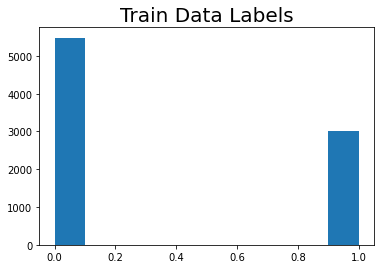

In [12]:
print(train_data.label.value_counts())
plt.hist(train_data.label)
plt.title('Train Data Labels',fontsize=20)
plt.show()

0    253
1    247
Name: label, dtype: int64


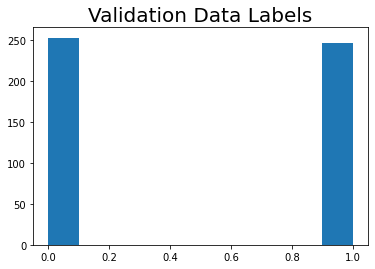

In [13]:
print(val_data.label.value_counts())
plt.hist(val_data.label)
plt.title('Validation Data Labels',fontsize=20)
plt.show()

0    1250
1     750
Name: label, dtype: int64


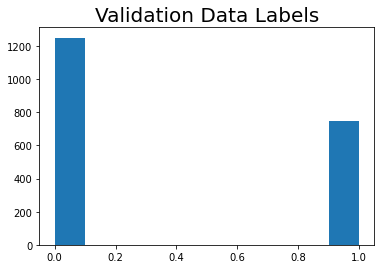

In [14]:
print(test_seen_data.label.value_counts())
plt.hist(test_seen_data.label)
plt.title('Validation Data Labels',fontsize=20)
plt.show()

0    510
1    490
Name: label, dtype: int64


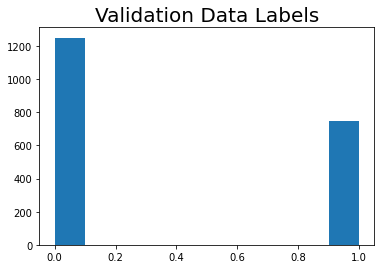

In [15]:
print(test_unseen_data.label.value_counts())
plt.hist(test_seen_data.label)
plt.title('Validation Data Labels',fontsize=20)
plt.show()

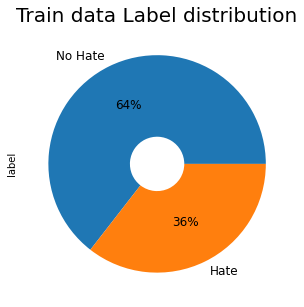

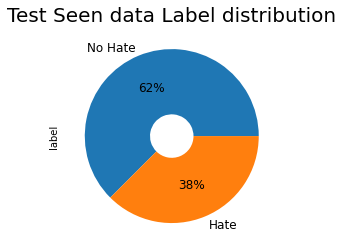

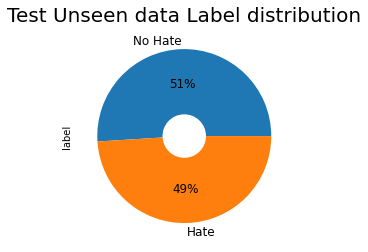

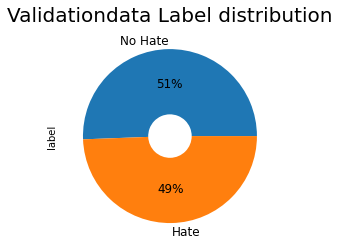

In [16]:
plt.figure(figsize=(20,5))
plt.title('Train data Label distribution', fontsize=20)
train_data.label.value_counts().plot(kind='pie', labels=['No Hate', 'Hate'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%', 
                              textprops={'fontsize': 12})
plt.show()

plt.title('Test Seen data Label distribution', fontsize=20)
test_seen_data.label.value_counts().plot(kind='pie', labels=['No Hate', 'Hate'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%', 
                              textprops={'fontsize': 12})
plt.show()

plt.title('Test Unseen data Label distribution', fontsize=20)
test_unseen_data.label.value_counts().plot(kind='pie', labels=['No Hate', 'Hate'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%', 
                              textprops={'fontsize': 12})
plt.show()

plt.title('Validationdata Label distribution', fontsize=20)
val_data.label.value_counts().plot(kind='pie', labels=['No Hate', 'Hate'],
                              wedgeprops=dict(width=.75), autopct='%1.0f%%', 
                              textprops={'fontsize': 12})
plt.show()



2 text -- 1 image 
1 text --- 2 image 


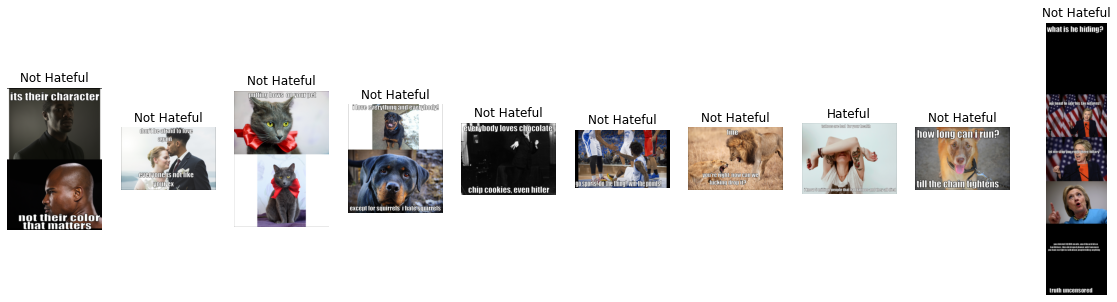

In [17]:
train_image =  train_data["img"]
train_label = train_data["label"]
path = "/content/gdrive/MyDrive/522-project/"
validation_img_paths =[]
title = []
for i in range(10):
   validation_img_paths.append(train_image[i])
   title.append(train_label[i])



img_list = [Image.open('/content/gdrive/MyDrive/522-project/' + img_path) for img_path in validation_img_paths]
fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    # ax.set_title("{:.0f}% non hateful, {:.0f}% hateful".format(100*pred_probs[i,0],
    #                                                         100*pred_probs[i,1]))
    ax.imshow(img)
    if title[i] == 0:
      ax.set_title("Not Hateful")
    else:
      ax.set_title("Hateful")





In [18]:
train_data

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
8495,10423,img/10423.png,1,nobody wants to hang auschwitz me
8496,98203,img/98203.png,1,when god grants you a child after 20 years of ...
8497,36947,img/36947.png,1,gays on social media: equality! body positivit...
8498,16492,img/16492.png,1,having a bad day? you could be a siamese twin ...


In [19]:
same_t = {}
# for a in train_data:
#   if train_data.keys
final_data = []
for index, row in train_data.iterrows():
  #print(index, row['text'], row['label'])
  if row['text'] in same_t.keys():
    if row['label'] !=  same_t[row['text']]:
      final_data.append(row['text'])
  else:
    same_t[row['text']] = row['label']

In [20]:
y=train_data[train_data.text == "obama voters"]
print(y)

         id            img  label          text
261   71364  img/71364.png      1  obama voters
389   94823  img/94823.png      0  obama voters
557   40965  img/40965.png      0  obama voters
2119  46978  img/46978.png      1  obama voters
3751  83914  img/83914.png      1  obama voters
4048  31684  img/31684.png      0  obama voters
5652  86041  img/86041.png      0  obama voters
6057  45601  img/45601.png      1  obama voters
7184  93165  img/93165.png      1  obama voters
7521  46730  img/46730.png      1  obama voters


In [21]:
t = train_data[train_data.text.isin(final_data)]
print(t)

         id            img  label  \
2     13894  img/13894.png      0   
8      2973  img/02973.png      0   
13    19324  img/19324.png      0   
21    70146  img/70146.png      0   
38     1569  img/01569.png      0   
...     ...            ...    ...   
8321  32516  img/32516.png      1   
8343  10834  img/10834.png      0   
8344  69073  img/69073.png      1   
8346  19472  img/19472.png      1   
8348  13806  img/13806.png      1   

                                                   text  
2                              putting bows on your pet  
8           how long can i run? till the chain tightens  
13    when you're the only dog left at the dog shelt...  
21    lets erect a memorial to all the americans mur...  
38    when you can't decide to pre heat the oven or ...  
...                                                 ...  
8321                       how to pick up jewish chicks  
8343  when my autistic son finds out we're having ch...  
8344                  women right

<class 'pandas.core.series.Series'>


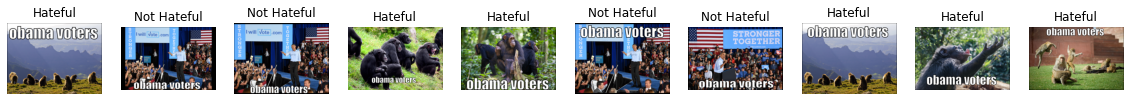

In [24]:
#27014, 24356

validation_img_paths =  y["img"]
title = y["label"]
print(type(title))
path = "/content/gdrive/MyDrive/522-project/"



img_list = [Image.open('/content/gdrive/MyDrive/522-project/' + img_path) for img_path in validation_img_paths]
fig, axs = plt.subplots(1, len(img_list), figsize=(20, 5))
for i, img in enumerate(img_list):
    ax = axs[i]
    ax.axis('off')
    # ax.set_title("{:.0f}% non hateful, {:.0f}% hateful".format(100*pred_probs[i,0],
    #                                                         100*pred_probs[i,1]))
    ax.imshow(img)



    if title.iloc[i] == 0:
      ax.set_title("Not Hateful")
    else:
      ax.set_title("Hateful")

In [25]:
same_t = {}
# for a in train_data:
#   if train_data.keys
final_data = []
for index, row in train_data.iterrows():
  #print(index, row['text'], row['label'])
  if row['img'] in same_t.keys():
    if row['label'] !=  same_t[row['img']]:
      final_data.append(row['img'])
  else:
    same_t[row['img']] = row['label']

In [26]:
final_data

[]